In [1]:
import json
import pandas as pd
import numpy as np
import prettytable as pt
from IPython.display import Image
import os 
import warnings
warnings.filterwarnings("ignore")



###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
yielddatadirectory=directory+"/data/yielddata/yielddata.csv"
voldatadirectory=directory+"/data/volatilitydata/capimpliedvol.csv"

yielddata = pd.read_csv(yielddatadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 
voldata = pd.read_csv(voldatadirectory)
voldata = voldata.replace(np.nan, '', regex=True) 



In [2]:
data = {
         "valuationDate": "2021-06-08",
         "settlementDate": "2021-06-10",
         "maturityDate": "2026-06-10",
         "notional": 10000000,
         "capFloorDefinition": {
           "type": "Collar",
           "capStrike": 0.00869080,
           "floorStrike": 0.008426,
           "calibrate": True,
           "frequency": "Quarterly",
           "startDate": "2021-09-10",
           "currency": "USD",
          #"volatility": 0.0,
           "method": "Bachelier",
           "volatilityModel": "Normal",
           "dayCounter": "Actual360",
           "calendar": "UnitedStates",
           "businessDayConvention": "ModifiedFollowing",
           "dateGeneration": "Backward",
           "endOfMonth": True,
           "fixingDate": ["2021-06-08"],
           "fixingRate": [0.001280],
         },
         "forecastCurve": {
           "settlementDays": 2,
           "intpMethod": "Linear",
           "currency": "USD",
           "calendar": "UnitedStates",
           "dayCounter": "Thirty360",
           "period": "3M",
           "instruments": {
             "DEPO": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360"
             },
             "FUTURES": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360",
               "market": "IMM",
             },
             "IRS": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Thirty360",
               "frequency": "Semiannual"
             }
           }
         },
         "discountCurve": {
           "settlementDays": 2,
           "intpMethod": "Linear",
           "currency": "USD",
           "calendar": "UnitedStates",
           "dayCounter": "Thirty360",
           "period": "3M",
           "instruments": {
             "DEPO": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360"
             },
             "FUTURES": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360",
               "market": "IMM",
             },
             "IRS": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Thirty360",
               "frequency": "Semiannual"
             }
           }
         },
  "yieldData": yielddata.to_dict('r'),
  "volatilityData" :voldata.to_dict('r')
  }

try:
    result = api.createTask(CalculationType.CAP_FLOOR, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()
    

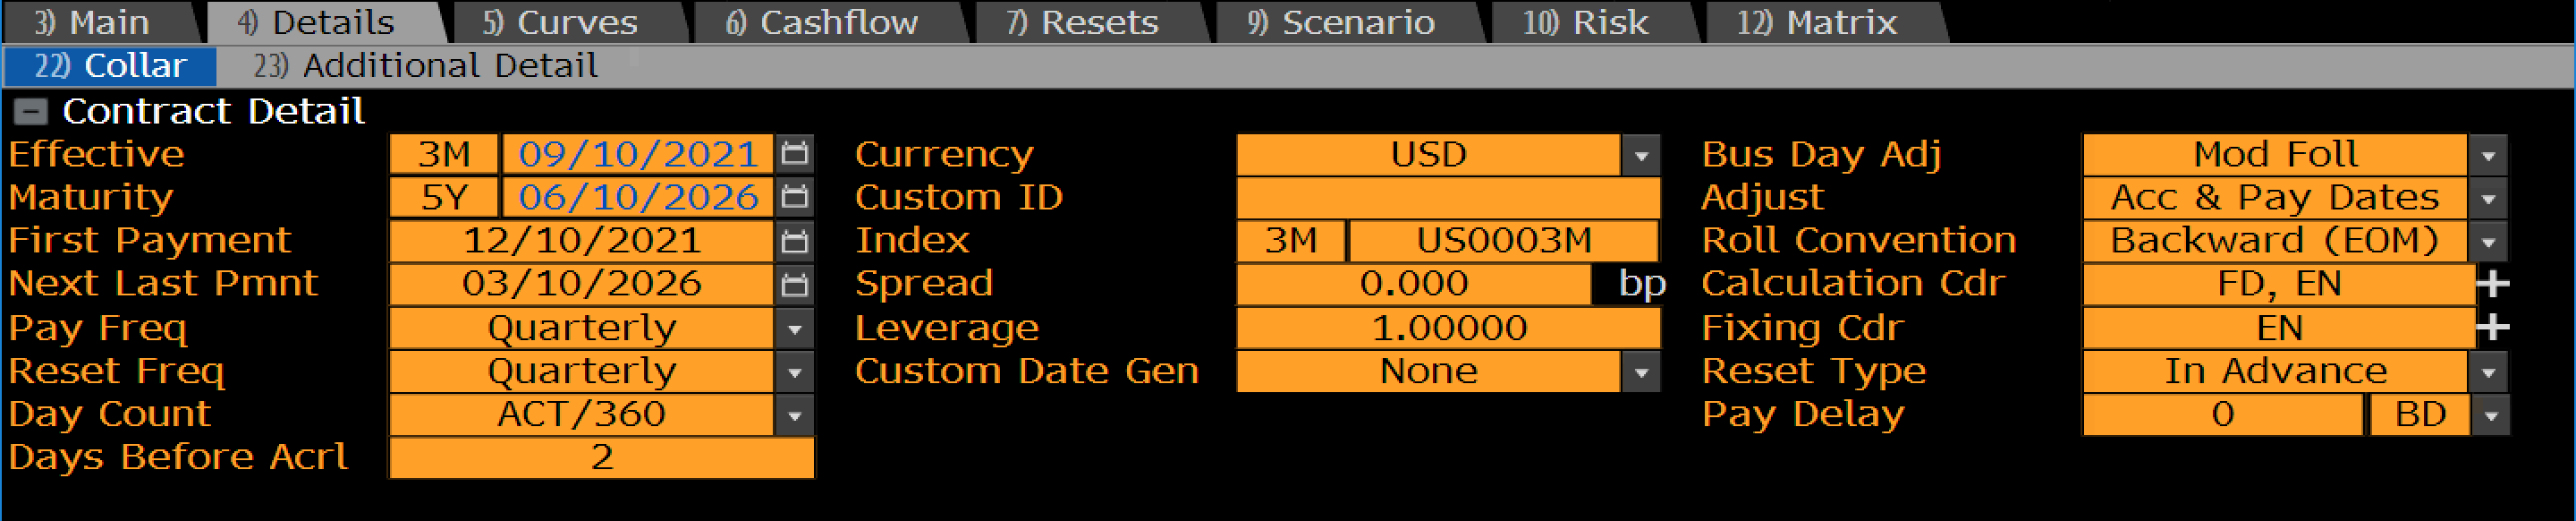

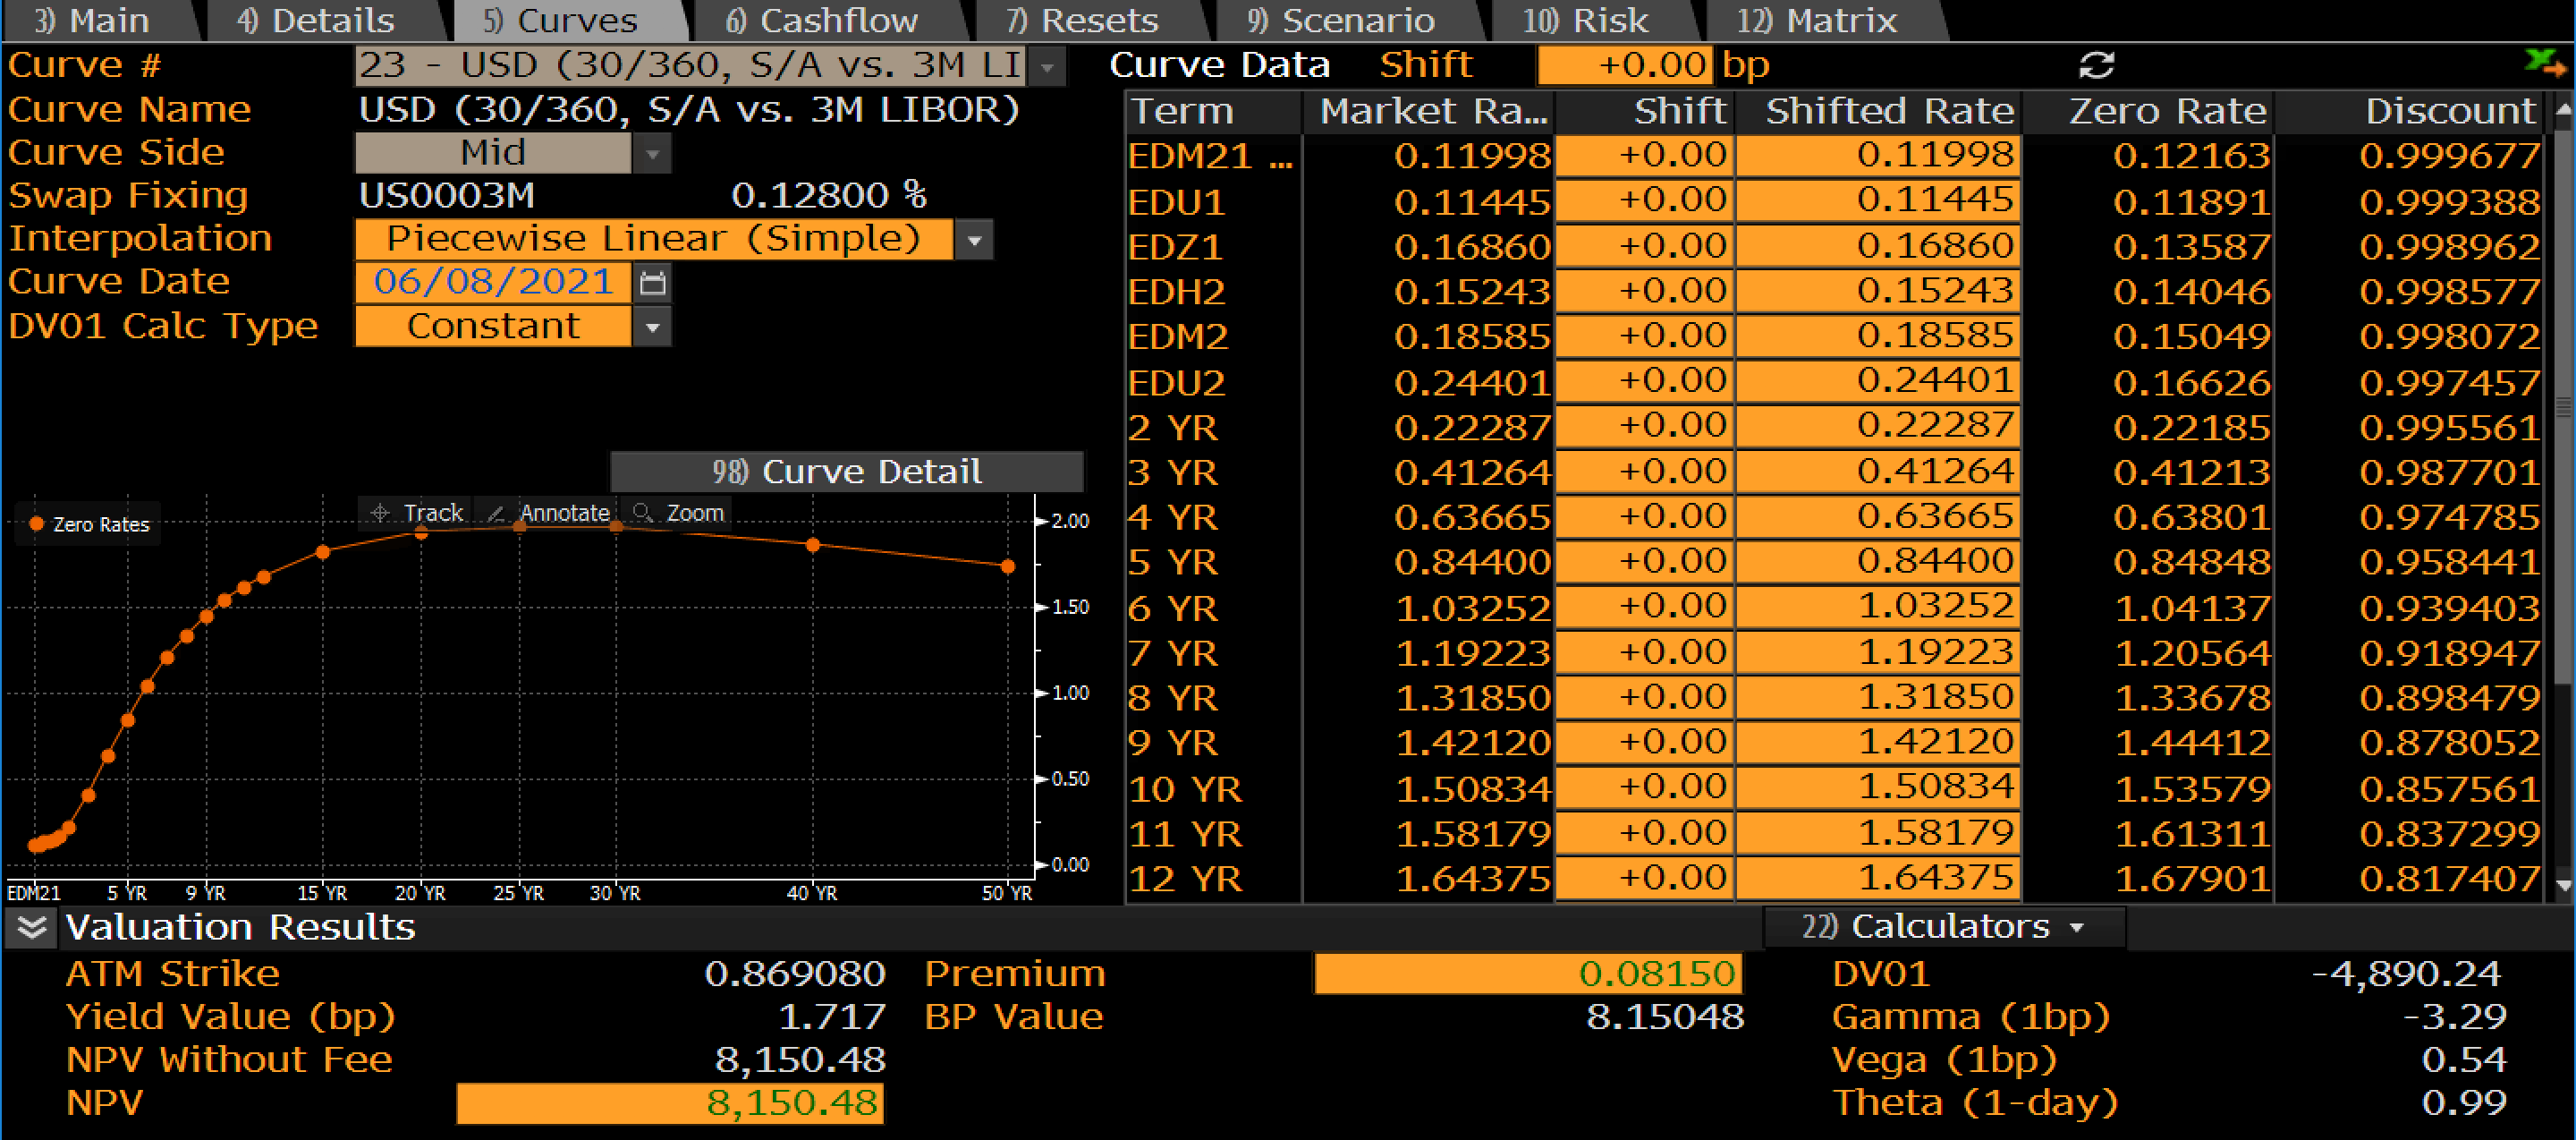

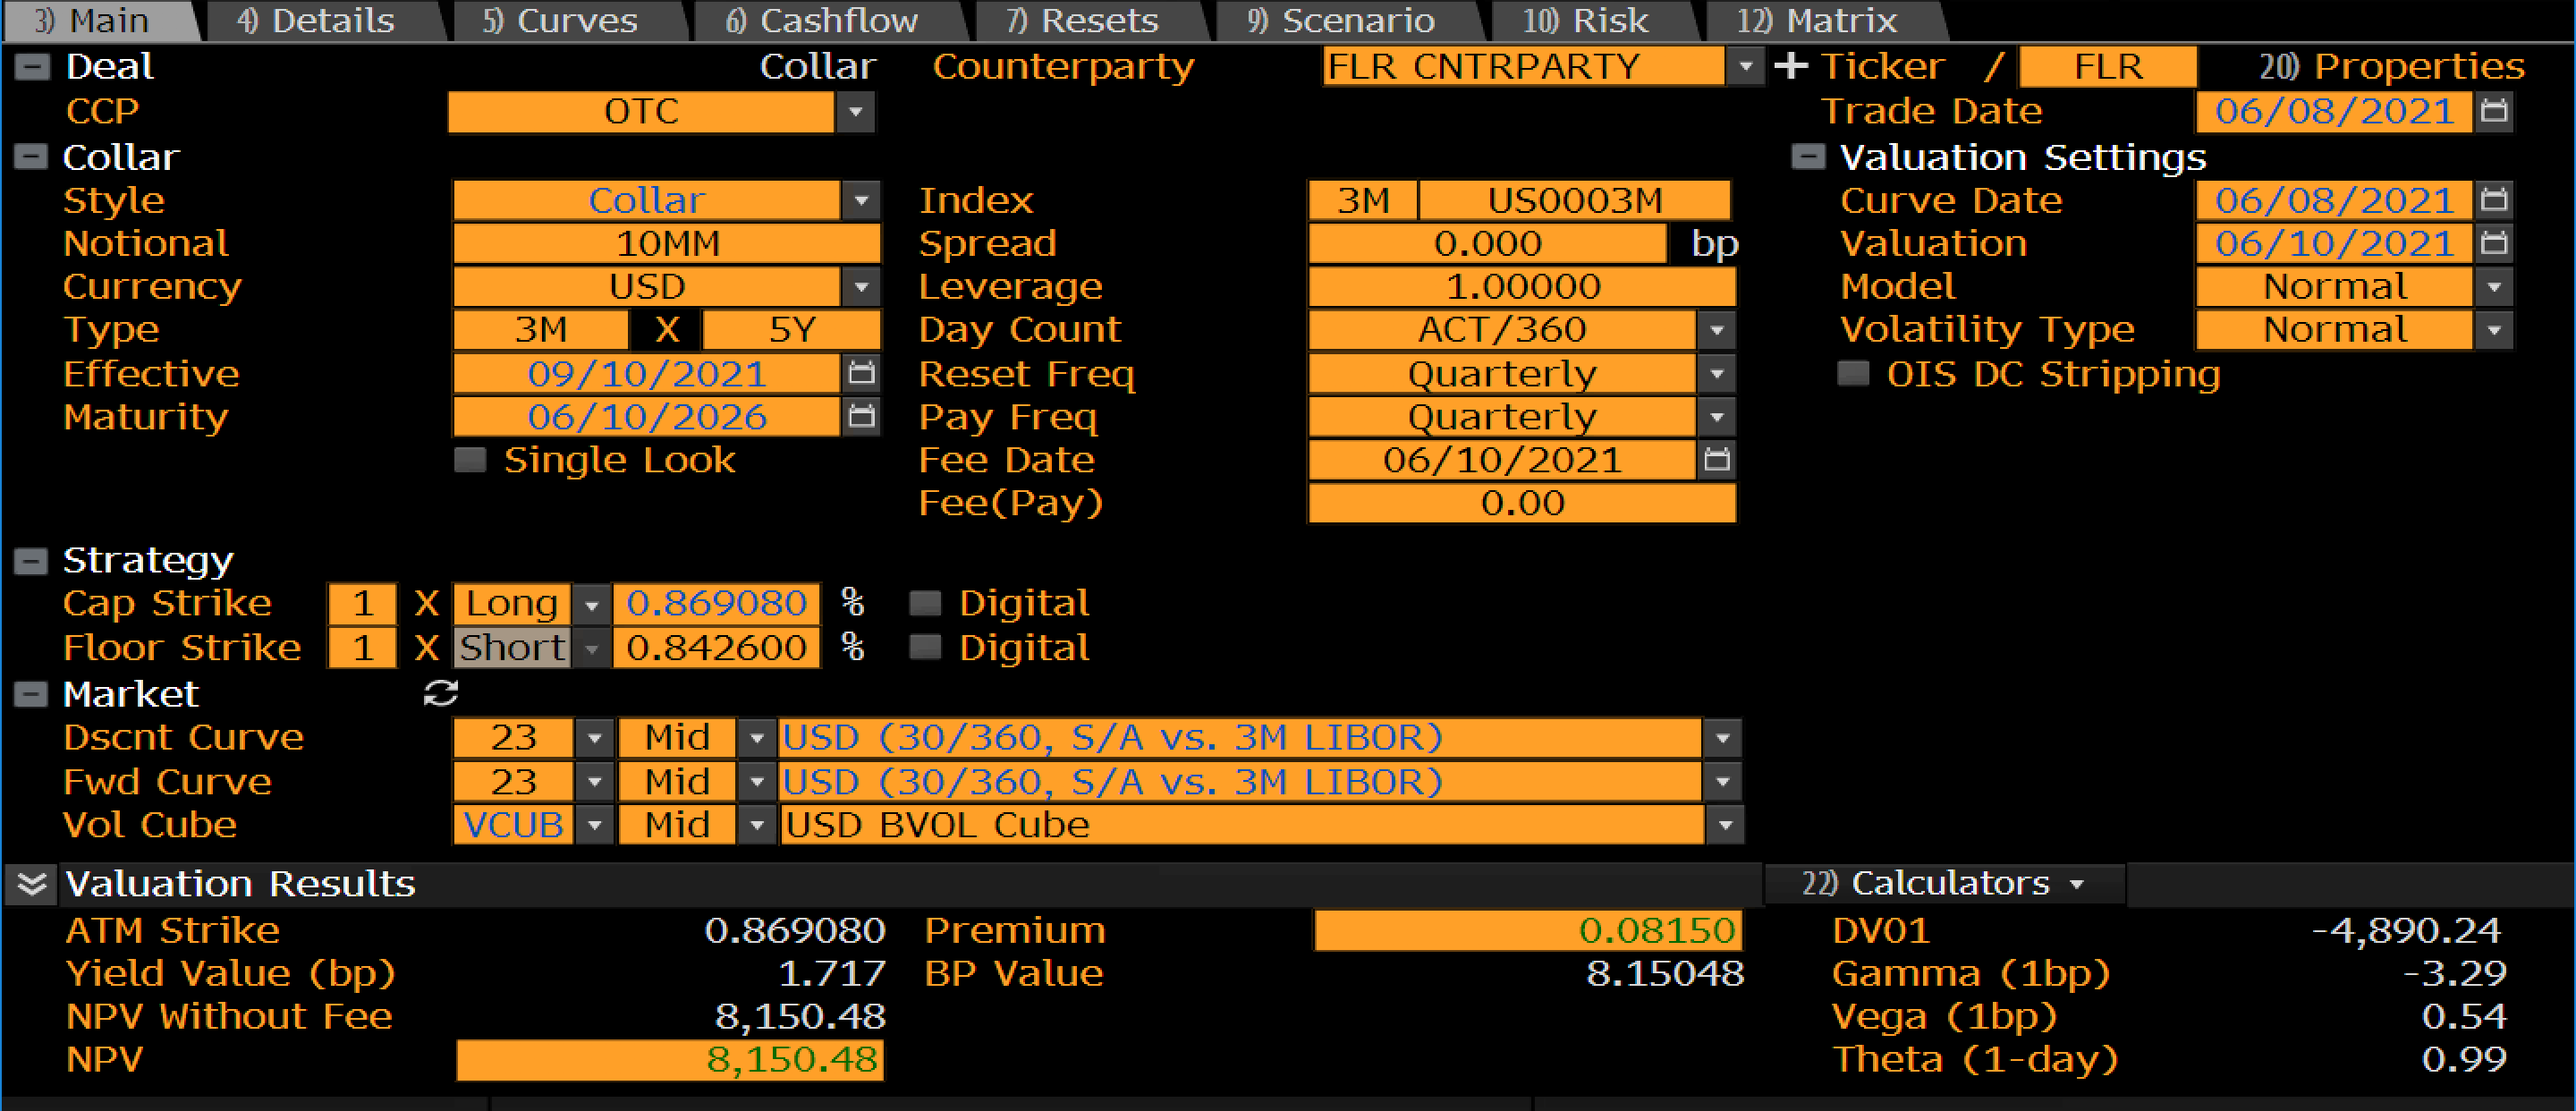

In [3]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Implied Volatility', 100*result.get('impliedVolatility')])
npvTable.add_row(['ATMStrike', 100*result.get('atmStrike')])
npvTable.add_row(['Vega', result.get('vega')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+--------------------+-----------+
|         Parameters |     Value |
+--------------------+-----------+
|                 PV | 8364.0861 |
| Implied Volatility |   36.2266 |
|          ATMStrike |    0.8693 |
|               Vega |    1.3352 |
+--------------------+-----------+


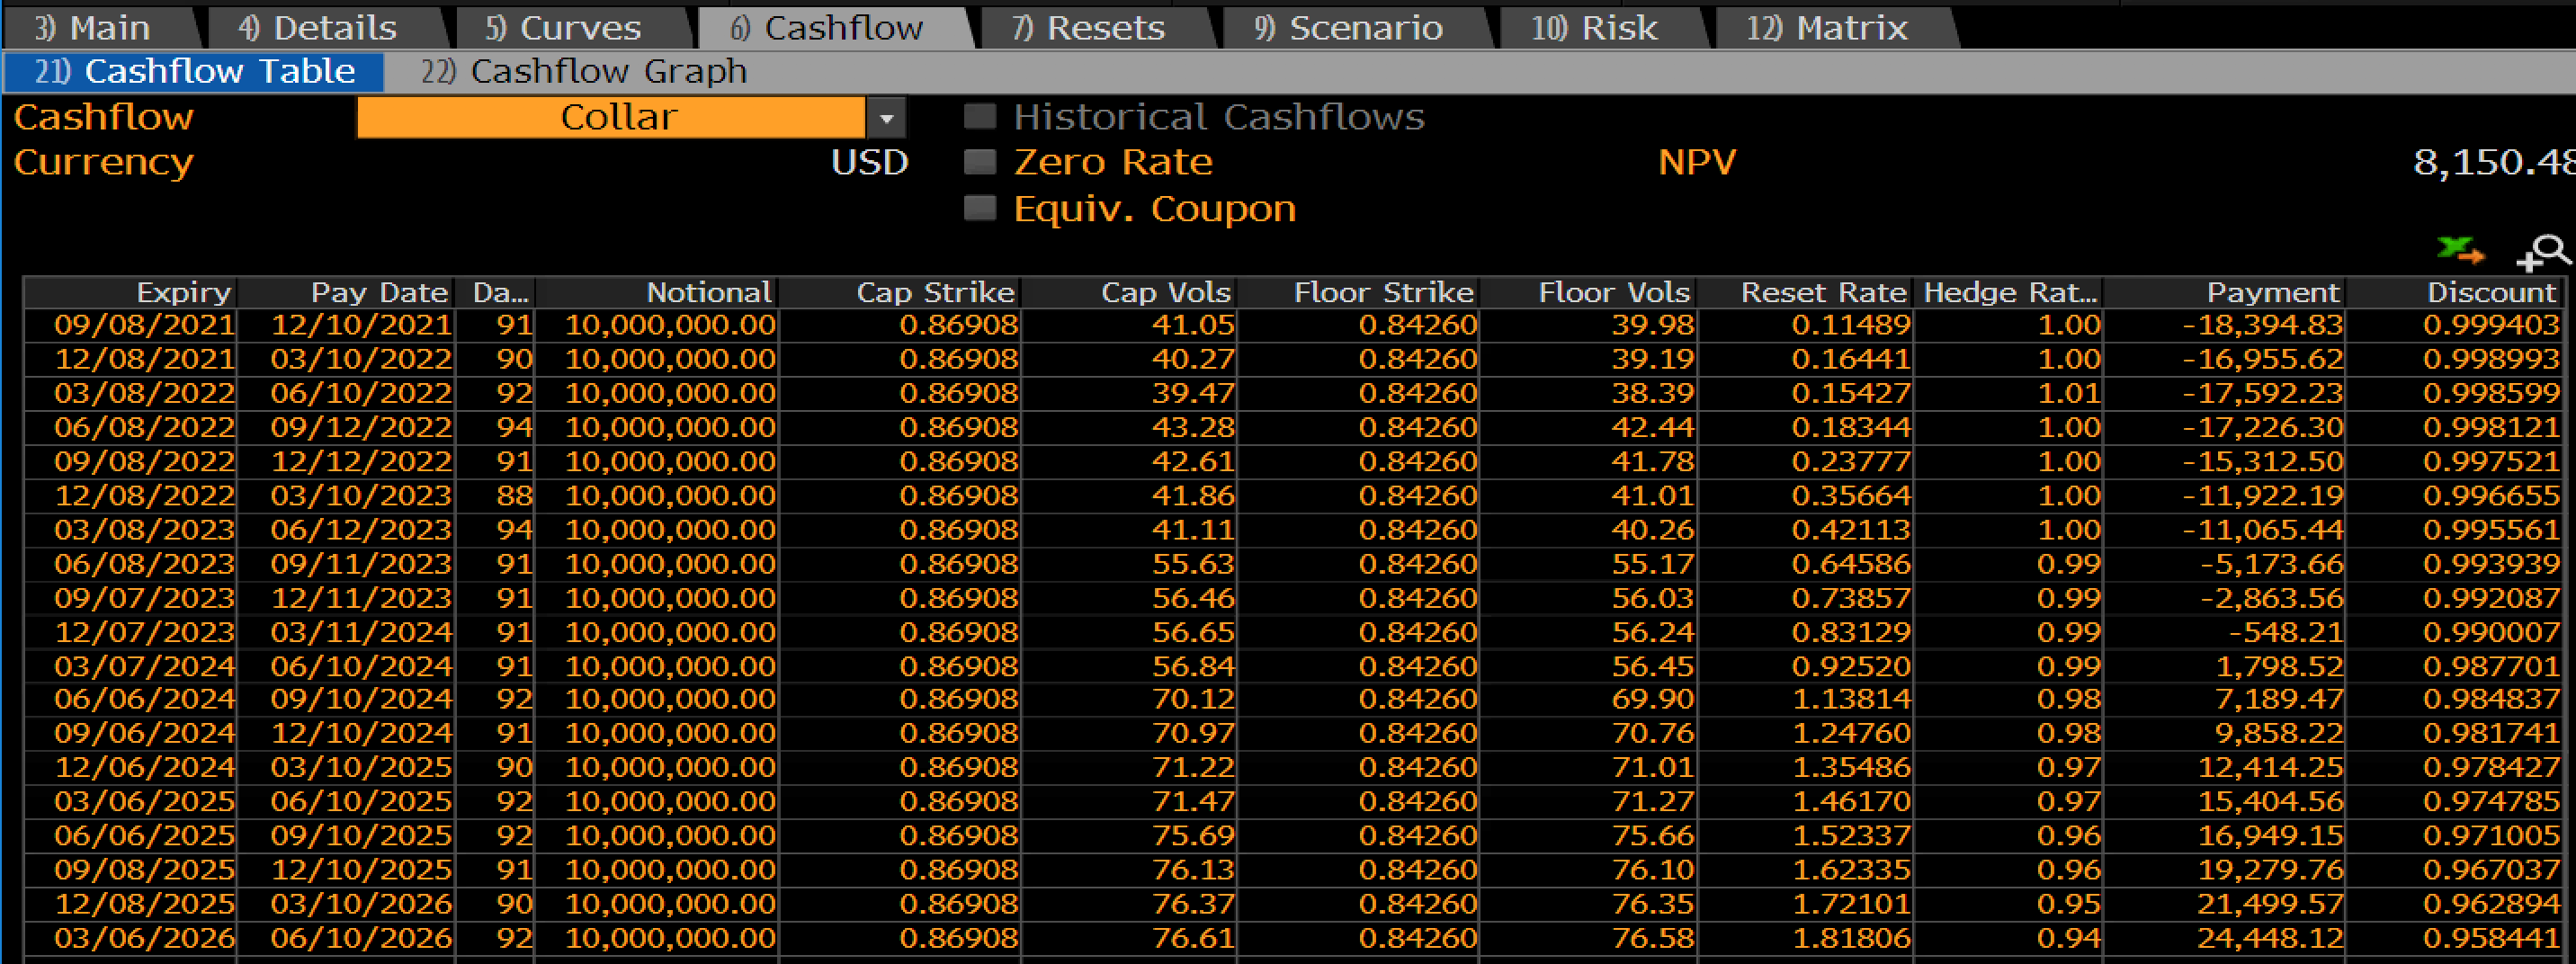

In [4]:
cashflows=pd.DataFrame(result.get("data"))
cashflows

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,capRate,floorRate,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv,resetRate,capVolatility,floorVolatility,hedgeRatio
0,2021-09-08,2021-09-10,2021-12-10,10000000,USD,Floating,Long,0.008691,0.008426,183,0.508333,-18307.293319,0.999392,-18296.168941,0.001179,0.391107,0.379625,-6.142081
1,2021-12-08,2021-12-10,2022-03-10,10000000,USD,Floating,Long,0.008691,0.008426,273,0.758333,-16835.521206,0.998972,-16818.206237,0.001685,0.392649,0.382025,-3.996427
2,2022-03-08,2022-03-10,2022-06-10,10000000,USD,Floating,Long,0.008691,0.008426,365,1.013889,-17457.374081,0.998567,-17432.354911,0.001586,0.394602,0.384817,-4.307696
3,2022-06-08,2022-06-10,2022-09-12,10000000,USD,Floating,Long,0.008691,0.008426,459,1.275000,-16997.389023,0.998070,-16964.584797,0.001906,0.400854,0.391902,-3.414778
4,2022-09-08,2022-09-12,2022-12-12,10000000,USD,Floating,Long,0.008691,0.008426,550,1.527778,-15001.363460,0.997444,-14963.019546,0.002483,0.414231,0.406035,-2.389984
5,2022-12-08,2022-12-12,2023-03-10,10000000,USD,Floating,Long,0.008691,0.008426,638,1.772222,-12011.003353,0.996588,-11970.023897,0.003513,0.441652,0.434365,-1.398698
6,2023-03-08,2023-03-10,2023-06-12,10000000,USD,Floating,Long,0.008691,0.008426,732,2.033333,-11500.425223,0.995540,-11449.137261,0.004031,0.483389,0.477181,-1.092650
7,2023-06-08,2023-06-12,2023-09-11,10000000,USD,Floating,Long,0.008691,0.008426,823,2.286111,-5251.528137,0.993932,-5219.661938,0.006401,0.540006,0.534908,-0.324540
8,2023-09-07,2023-09-11,2023-12-11,10000000,USD,Floating,Long,0.008691,0.008426,914,2.538889,-2750.160692,0.992072,-2728.358015,0.007416,0.597016,0.592763,-0.146702
9,2023-12-07,2023-12-11,2024-03-11,10000000,USD,Floating,Long,0.008691,0.008426,1005,2.791667,-411.951860,0.989979,-407.823708,0.008365,0.643178,0.639395,-0.019484
